In [11]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [3]:
# Load the credit card transaction data
df = pd.read_csv('/home/sihartist/Desktop/fraud-detection/algo/dataset/data_balanced.csv')
#df.drop('step', axis = 1, inplace = True)
df=df.iloc[:,1:]
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.0,0.0,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.0,0.0,220970.84,232249.12,0,1,0,0,0,0,0


In [21]:
# Split the data into features and target variable
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X = X.values
y = y.values

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9920876445526476


In [25]:
n_errors = (y_pred != y_test).sum()
print("The model used is Decision Tree  classifier")
  
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
  

The model used is Decision Tree  classifier
The accuracy is 0.9920876445526476
The precision is 0.9896656534954408
The recall is 0.9945021380574222
The F1-Score is 0.9920780012187691


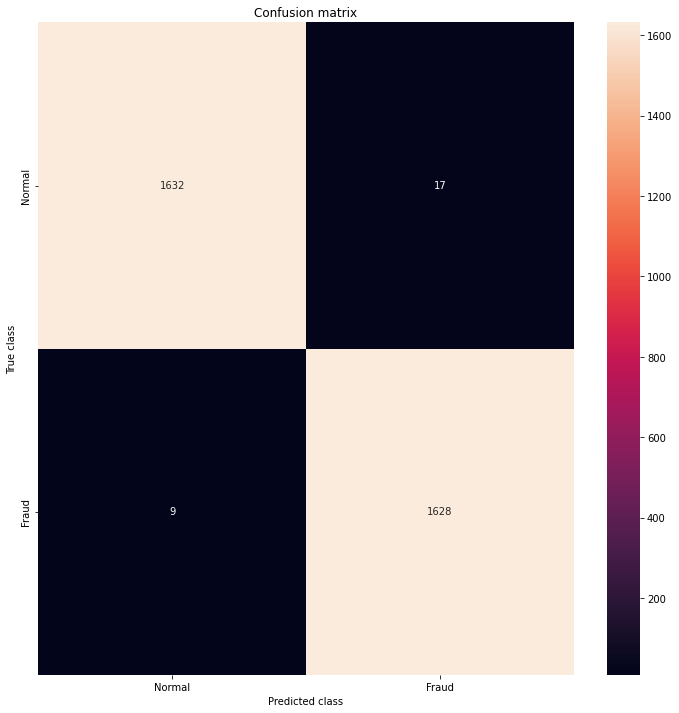

In [26]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [28]:
import joblib
# save
joblib.dump(clf, "./models/tree_decision.joblib")
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./models/tree_decision.joblib")

In [29]:
test1=[139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0 ,0 ]
to_predict = np.array(test1).reshape(1,12)

loaded_rf.predict(to_predict) 

array([0], dtype=int64)

In [32]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(clf, open("./models/D_Tree.pkl","wb"))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the credit card transaction data
df = pd.read_csv("credit_card_transactions.csv")

# Split the data into features and target variable
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
